# Callback Functions

#### Assignment
1. Install and load the latest versions of TensorFlow and Keras. Print their versions.
2. Load the Wine Quality dataset and explore its dimensions.
    * **Dataset link:** *https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification*
3. Check for null values, identify categorical variables, and encode them.
4. Separate the features and target variables from the dataframe.
5. Perform a train-test split and divide the data into training, validation, and test datasets.
6. Perform scaling on the dataset.
7. Create at least 2 hidden layers and an output layer for the binary categorical variables.
8. Create a Sequential model and add all the layers to it.
9. Implement a TensorBoard callback to visualize and monitor the model's training process.
10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.
11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.
12. Print the model summary.
13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
14. Compile the model with the specified loss function, optimizer, and metrics.
15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.
16. Get the model's parameters.
17. Store the model's training history as a Pandas DataFrame.
18. Plot the model's training history.
19. Evaluate the model's performance using the test data.

In [1]:
#1. loading the latest versions of TensorFlow and Keras and printing their versions.
import tensorflow as tf
import keras
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.13.0
Keras version: 2.13.1


Dimensions of Datasets: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.

C:\Users\SALESKEN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 0s 7ms/step - loss: 0.6457 - accuracy: 0.6934 - val_loss: 0.6372 - val_accuracy: 0.6719
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6270 - accuracy: 0.6934 - val_loss: 0.6200 - val_accuracy: 0.6781
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6074 - accuracy: 0.7112 - val_loss: 0.5992 - val_accuracy: 0.6906
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5876 - accuracy: 0.7164 - val_loss: 0.5802 - val_accuracy: 0.7094
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5688 - accuracy: 0.7268 - val_loss: 0.5647 - val_accuracy: 0.7156
Epoch 8/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5547 - accuracy: 0.7331 - val_loss: 0.5514 - val_accuracy: 0.7312
Epoch 9/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5460 - accuracy: 0.7393 - val_loss: 0.5429 - val_accuracy: 0.7406
Epoch 10/100
15/15 [=====

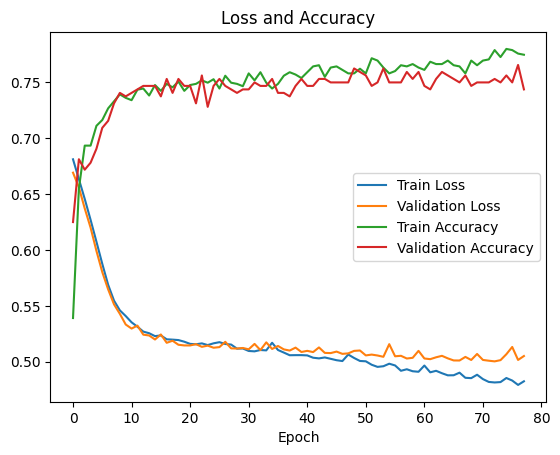

--------------------------------------------------
10/10 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7281
Test Loss: 0.5021
Test Accuracy: 0.7281
--------------------------------------------------


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as pt

#2. Loading the Wine Quality dataset and exploring its dimensions
fp = "D:\Python Coding\PWassignment\wine.csv"
ds = pd.read_csv(fp)
print(f"Dimensions of Datasets: {ds.shape}",)
print(ds.head())
print('-' * 50)

#3. Checking for null values & Identifying categorical variables, and encodeing them.
print(ds.isnull().sum())
print('-' * 50)
cat_col = ds.select_dtypes(include=['object','category']).columns
print('Categorical Variables are :',cat_col)
print('-' * 50)
ds = pd.get_dummies(ds, columns=cat_col, drop_first='True')
print(ds.head())
print('-' * 50)

#4. Separating the features and target variables from the dataframe.
x = ds.drop(columns=['quality_good'])
y = ds['quality_good']
print("Dimensions after spliting the datasets:","X:", x.shape, "y:", y.shape)
print('-' * 50)

#5. Performing a train-test split and then dividing it into training, validation, and test datasets.
X_train, X_Test, y_train, y_Test = train_test_split(x,y, test_size=0.4, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_Test,y_Test, test_size=0.5, random_state=47)
print("Dimensions after spliting the datasets:",
      "\nTraining set - X:", X_train.shape, "y:", y_train.shape,
      "\nValidation set - X:", X_val.shape, "y:", y_val.shape,
      "\nTest set - X:", X_test.shape, "y:", y_test.shape)
print('-' * 50)

#6. Performing scaling on the dataset.
mms = MinMaxScaler()
x_train = mms.fit_transform(X_train)
x_val = mms.transform(X_val)
x_test = mms.transform(X_test)

#7. Creating 2 hidden layers and an output layer for the binary categorical variables.
hl1 = layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1],))
hl2 = layers.Dense(units=32, activation='relu')
opl = layers.Dense(units=1, activation='sigmoid')

#8. Creating a Sequential model and adding all the layers to it.
model = Sequential([hl1, hl2, opl])

#9. Implement a TensorBoard callback to visualize and monitor the model's training process.
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

#10. Using Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#11. Implementing a ModelCheckpoint callback to save the best model based on a chosen metric during training.
checkpt = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

#12. Printing the model summary.
print(model.summary())
print('-' * 50)

#13. Using binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
#14. Compile the model with the specified loss function, optimizer, and metrics.
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

#15. Fiting the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val,y_val),
                   callbacks=[tensorboard_callback, early_stop, checkpt])

#16. Getting the model's parameters.
params = model.trainable_variables
for p in params:
    print(f"Parameter Shape: {p.shape}, Total Parameters: {p.numpy().size}")
print('-' * 50)
    
#17. Storing the model's training history as a Pandas DataFrame.
history_df = pd.DataFrame(history.history)
print(history_df.head())
print('-' * 50)

#18. Ploting the model's training history.
pt.plot(history.history['loss'])
pt.plot(history.history['val_loss'])
pt.plot(history.history['accuracy'])
pt.plot(history.history['val_accuracy'])
pt.title('Loss and Accuracy')
pt.xlabel('Epoch')
pt.legend(['Train Loss', 'Validation Loss', 'Train Accuracy', 'Validation Accuracy'])
pt.show()
print('-' * 50)

#19. Evaluating the model's performance using the test data.
tloss, tacc = model.evaluate(x_test, y_test)
print(f"Test Loss: {tloss:.4f}")
print(f"Test Accuracy: {tacc:.4f}")
print('-' * 50)